# Description

This notebook used the approach introduced by Jin and Protopapas to compute QNMs of an **asymptotically flat Schwarzschild black hole**.

Built upon: 
* BothBounds_infinite (Jin's code)
* https://github.com/henry1jin/eigeNN

Remarks:
* Good for calculating high multipole numbers for fundamental mode, n=0.


#Physics-informed Neural Network structure

Seed and literature values

In [2]:
def Seed(S=2, M=1, L=2, N=0):
      #S, spin of perturbing field; M, Mass of black hole; L, multipole number; N, principal number.

      ## massless scalar perturbations (spin 0)
      # seed values
      Omega_seed1 = {'L_0,N_0': 0.11-0.10*1j,
                    'L_0,N_1': 0.08-0.34*1j,
                    'L_1,N_0': 0.29-0.09*1j,
                    'L_1,N_1': 0.26-0.30*1j,
                    'L_1,N_2': 0.22-0.54*1j,
                    'L_1,N_3': 0.20-0.78*1j,
                    'L_2,N_0': 0.48-0.09*1j,
                    'L_2,N_1': 0.46-0.29*1j,
                    'L_2,N_2': 0.43-0.50*1j,
                    'L_2,N_3': 0.39-0.73*1j}
      # Leaver
      Omega_Lvr1 = {'L_0,N_0': 0.1105-0.1049*1j,
                    'L_0,N_1': 0.0861-0.3481*1j,
                    'L_1,N_0': 0.2929-0.0977*1j,
                    'L_1,N_1': 0.2645-0.3063*1j,
                    'L_1,N_2': 0.2295-0.5401*1j,
                    'L_1,N_3': 0.2033-0.7883*1j,
                    'L_2,N_0': 0.4836-0.0968*1j,
                    'L_2,N_1': 0.4639-0.2956*1j,
                    'L_2,N_2': 0.4305-0.5086*1j,
                    'L_2,N_3': 0.3939-0.7381*1j}

      ## electromagnetic perturbations (spin 1)
      # seed values 
      Omega_seed2 = {'L_1,N_0': 0.24-0.09*1j,
                    'L_1,N_1': 0.21-0.29*1j,
                    'L_1,N_2': 0.17-0.52*1j,
                    'L_1,N_3': 0.14-0.77*1j,
                    'L_2,N_0': 0.45-0.09*1j,
                    'L_2,N_1': 0.43-0.29*1j,
                    'L_2,N_2': 0.40-0.50*1j,
                    'L_2,N_3': 0.36-0.73*1j,
                    'L_3,N_0': 0.65-0.09*1j,
                    'L_3,N_1': 0.64-0.28*1j,
                    'L_3,N_2': 0.61-0.49*1j,
                    'L_3,N_3': 0.57-0.70*1j}
      # Leaver 
      Omega_Lvr2 = {'L_1,N_0': 0.2483-0.0925*1j,
                  'L_1,N_1': 0.2145-0.2937*1j,
                  'L_1,N_2': 0.1748-0.5252*1j,
                  'L_1,N_3': 0.1462-0.7719*1j,
                  'L_2,N_0': 0.4576-0.0950*1j,
                  'L_2,N_1': 0.4365-0.2907*1j,
                  'L_2,N_2': 0.4012-0.5016*1j,
                  'L_2,N_3': 0.3626-0.7302*1j,
                  'L_3,N_0': 0.6569-0.0956*1j,
                  'L_3,N_1': 0.6417-0.2897*1j,
                  'L_3,N_2': 0.6138-0.4921*1j,
                  'L_3,N_3': 0.5779-0.7063*1j}

      ## gravitational perturbations (spin 2)
      # seed values 
      Omega_seed3 =  {'L_2,N_0': 0.37-0.08*1j,
                  'L_2,N_1': 0.34-0.27*1j,
                  'L_2,N_2': 0.30-0.47*1j,
                  'L_2,N_3': 0.25-0.70*1j,
                  'L_3,N_0': 0.59-0.09*1j,
                  'L_3,N_1': 0.58-0.28*1j,
                  'L_3,N_2': 0.55-0.47*1j,
                  'L_3,N_3': 0.51-0.69*1j,
                  'L_3,N_4': 0.47-0.91*1j,
                  'L_3,N_5': 0.43-1.15*1j,
                  'L_4,N_0': 0.80-0.09*1j,
                  'L_4,N_1': 0.79-0.28*1j,
                  'L_4,N_2': 0.77-0.47*1j,
                  'L_4,N_3': 0.73-0.68*1j,
                  'L_4,N_4': 0.70-0.89*1j}
      # Leaver 
      Omega_Lvr3 = {'L_2,N_0': 0.3737-0.0890*1j,
                  'L_2,N_1': 0.3467-0.2739*1j,
                  'L_2,N_2': 0.3011-0.4783*1j,
                  'L_2,N_3': 0.2515-0.7051*1j,
                  'L_3,N_0': 0.5994-0.0927*1j,
                  'L_3,N_1': 0.5826-0.2813*1j,
                  'L_3,N_2': 0.5517-0.4791*1j,
                  'L_3,N_3': 0.5120-0.6903*1j,
                  'L_3,N_4': 0.4702-0.9156*1j,
                  'L_3,N_5': 0.4314-1.1520*1j,
                  'L_4,N_0': 0.8092-0.0942*1j,
                  'L_4,N_1': 0.7966-0.2843*1j,
                  'L_4,N_2': 0.7727-0.4799*1j,
                  'L_4,N_3': 0.7398-0.6839*1j,
                  'L_4,N_4': 0.7015-0.8982*1j}

      ## Dirac perturbations (spin 0.5)
      # seed values 
      Omega_seed4 = {'L_1,N_0': 0.28-0.09*1j,
                    'L_1,N_1': 0.25-0.30*1j,
                    'L_2,N_0': 0.47-0.09*1j,
                    'L_2,N_1': 0.45-0.29*1j,
                    'L_2,N_2': 0.42-0.50*1j,
                    'L_3,N_0': 0.67-0.09*1j,
                    'L_3,N_1': 0.65-0.29*1j,
                    'L_3,N_2': 0.62-0.49*1j,
                    'L_3,N_3': 0.59-0.71*1j}
      # 6th order WKB
      Omega_Lvr4 = {'L_1,N_0': 0.2822-0.0967*1j,
                    'L_1,N_1': 0.2525-0.3040*1j,
                    'L_2,N_0': 0.4772-0.0963*1j,
                    'L_2,N_1': 0.4571-0.2945*1j,
                    'L_2,N_2': 0.4231-0.5070*1j,
                    'L_3,N_0': 0.6708-0.0963*1j,
                    'L_3,N_1': 0.6560-0.2917*1j,
                    'L_3,N_2': 0.6286-0.4950*1j,
                    'L_3,N_3': 0.5932-0.7102*1j}

      # Spin weights
      Omega_seed={"S_0":Omega_seed1,
                  "S_1":Omega_seed2,
                  "S_2":Omega_seed3,
                  "S_0.5":Omega_seed4}
      Omega_Lvr={"S_0":Omega_Lvr1,
                "S_1":Omega_Lvr2,
                "S_2":Omega_Lvr3,
                "S_0.5":Omega_Lvr4} 

      omega_seed = Omega_seed['S_{}'.format(S)]['L_{},N_{}'.format(L,N)]
      omega_Lvr = Omega_Lvr['S_{}'.format(S)]['L_{},N_{}'.format(L,N)]

      return omega_seed, omega_Lvr

In [3]:
# Importing libraries
!pip install pydub
import numpy as np
import torch
import torch.optim as optim
from torch.autograd import grad
from torch.autograd import Variable
import matplotlib.pyplot as plt
import time
import copy
from scipy.integrate import odeint
from tqdm import tqdm # for viewing progress during training
dtype=torch.float64
torch.set_default_dtype(torch.float64) 

# Set-up for the plots
plt.rc('xtick', labelsize=16) 
plt.rcParams.update({'font.size': 16})

# Define the sin() activation function
class mySin(torch.nn.Module):
    @staticmethod
    def forward(input):
        return torch.sin(input)
    
# Autograd and training points
def dfx(x,f):
    return grad([f], [x], grad_outputs=torch.ones(f.shape, dtype=dtype), create_graph=True)[0] 

def Training_Points(grid,xi0,xif,sig=0.5): # \xi coordinate
    delta_xi = grid[1] - grid[0]  
    noise = delta_xi * torch.randn_like(grid)*sig
    xi = grid + noise
    xi.data[2] = torch.ones(1,1)*(-1)
    xi.data[xi<xi0]=xi0 - xi.data[xi<xi0]
    xi.data[xi>xif]=2*xif - xi.data[xi>xif]
    xi.data[0] = torch.ones(1,1)*xi0
    xi.data[-1] = torch.ones(1,1)*xif
    xi.requires_grad = False
    return xi

Perturbation equations

In [4]:
def Parametric_Solution(y, nn, t0): 
    N = nn(y)[0]
    psi1_hat = N[:,0].reshape(-1,1)
    psi2_hat = N[:,1].reshape(-1,1)
    return psi1_hat, psi2_hat

def Perturbation_Equation(xi, psi1, psi2, omega1, omega2, S, M, L):
    psi1_dxi = dfx(xi,psi1)
    psi1_ddxi= dfx(xi,psi1_dxi)
    psi2_dxi = dfx(xi,psi2)
    psi2_ddxi= dfx(xi,psi2_dxi)

    omega = omega1 + omega2*1j

    Lambda_0 = (4*M*1j*(omega**1)*(2*(xi**2) - 4*xi + 1) - (1 - 3*xi)*(1 - xi))
    S_0 = (16*(M**2)*(omega**2)*(xi - 2) - 8*M*1j*(omega**1)*(1 - xi) + L*(L + 1) + (1 - S**2)*(1 - xi))

    f = (xi*((1 - xi)**2))*(psi1_ddxi + psi2_ddxi*1j) - Lambda_0*(psi1_dxi + psi2_dxi*1j) - S_0*(psi1 + psi2*1j)

    Loss = ((f.abs()).pow(2)).mean();
    return Loss

Feed-forward Neural Network & training routine

In [5]:
# Feed-forward neural network
class FFNN(torch.nn.Module):
    def __init__(self, D_hid):
        super(FFNN,self).__init__()

        # Define the Activation
        #self.actF = torch.nn.Tanh()
        # self.actF = torch.nn.Sigmoid()   
        self.actF = mySin()
         
        # I adjusted the code here to get different configurations of layers (rectangle, funnel, reverse-funnel)
        self.omega1in   = torch.nn.Linear(1,1)
        self.omega2in   = torch.nn.Linear(1,1)
        self.Lin_1  = torch.nn.Linear(3, 50) 
        self.Lin_2  = torch.nn.Linear(50, 50)
        self.out    = torch.nn.Linear(50, 2)

    def forward(self,t):
        In1 = self.omega1in(torch.ones_like(t))
        In2 = self.omega2in(torch.ones_like(t)*(-1))
        L1 = self.Lin_1(torch.cat((t, In1, In2), 1))
        h1 = self.actF(L1)
        L2 = self.Lin_2(h1)
        h2 = self.actF(L2)
        out = self.out(h2)
        return out, In1, In2

# Train the NN
def run_Scan_Black_Hole(t0, tf, neurons, epochs, n_train,lr, minibatch_number, omega_seed, omega_Lvr, S, M, L):   
    fc0 = FFNN(neurons)
    fc1=0; 
    betas = [0.999, 0.9999]
    optimizer = optim.Adam(fc0.parameters(), lr=lr, betas=betas)
    Loss_history = []
    Llim =  1e+20
    omega_seed_loss_history = []
    Psi_nontriv_loss_history = []
    PE_loss_history = []
    criteria_loss_history = []
    omega1_history = [] # stores real part of Eigenvalue during training
    omega2_history = [] # stores imaginary part of Eigenvalue during training
    PDev_real_history = []
    PDev_imag_history = []
    di = (None, 1e+20) 
    # Energy bins to store the model with lowest loss for a given range of the energy.
    dic = {0:di, 1:di, 2:di, 3:di, 4:di, 5:di, 6:di, 7:di, 8:di, 9:di, 10:di}
    
    grid = torch.linspace(xi0, xif, n_train).reshape(-1,1)
    
    # TRAINING ITERATION    
    TeP0 = time.time()

    for tt in tqdm(range(epochs), leave=False): 

        xi=Training_Points(grid,xi0,xif,sig=.03*xif)
            
        # BATCHING 
        batch_size = int(n_train/minibatch_number)
        batch_start, batch_end = 0, batch_size

        idx = np.random.permutation(n_train)
        xi_b = xi[idx] 
        xi_b.requires_grad = True 
        xi_f=xi[-1]
        xi_f=xi_f.reshape(-1,1)
        xi_f.requires_grad = True
        loss=0.0

        for nbatch in range(minibatch_number): 

            xi_mb = xi_b[batch_start:batch_end] 

            # NETWORK SOLUTIONS
            nn, omega1, omega2 = fc0(xi_mb)
            
            omega1_history.append(omega1[0].data.tolist()[0])
            omega2_history.append(omega2[0].data.tolist()[0])
            
            psi1, psi2 = Parametric_Solution(xi_mb, fc0, xi0)
            Ltot1 = Perturbation_Equation(xi_mb, psi1, psi2, omega1, omega2, S, M, L)
            
            #Losses
            Ltot2 = Ltot1 + 1/((((psi1 + psi2*1j).abs())**2).mean() + 1e-6) #+ 1/(((((omega1 + omega2*1j)**2).abs())**2).mean() + 1e-6) 
            seed_loss = (((omega_seed - (omega1 + omega2*1j)).abs())**2).mean() # Seed Value Loss
  
            if Ltot2.item() < seed_loss.item(): # this must not be too small or it will learn the seed
              Ltot = Ltot2 
            else:
              Ltot = 2*Ltot2 + seed_loss
                
            #percentage deviation = L2 relative error * 100
            PDev1 = (((abs(omega1) - abs((omega_Lvr).real))/abs((omega_Lvr).real))*100).mean()
            PDev2 = (((abs(omega2) - abs((omega_Lvr).imag))/abs((omega_Lvr).imag))*100).mean()
            PDev_real_history.append(PDev1.item())
            PDev_imag_history.append(PDev2.item())
            
            # Losses histories
            criteria_loss_history.append(Ltot) # Total Loss
            PE_loss_history.append(Ltot1) # Perturbation Equation Loss
            Psi_nontriv_loss_history.append(1/((((psi1 + psi2*1j).abs()).pow(2)).mean()+1e-6)) # Psi Nontrivial Loss 
            omega_seed_loss_history.append(seed_loss.item()) # Seed Value Loss

            # OPTIMIZER
            Ltot.backward(retain_graph=False);            
            optimizer.step()
            loss += Ltot.data.numpy() 
            optimizer.zero_grad()
   
            batch_start +=batch_size 
            batch_end +=batch_size

        Loss_history.append(loss) 
        
        if tt % 1000 == 0 and tt > 0:
            print(str(omega1_history[-1]) + ':' + str(omega2_history[-1]) + ':' + str(Ltot.item()) + ':' + str(seed_loss.item()) + ':' + str(PDev_real_history[-1]) + ':' + str(PDev_imag_history[-1]))
 
        # keep the best model (lowest loss) by using a deep copy
        if  Ltot1.item() < Llim:
            fc1 =  copy.deepcopy(fc0) 
            Llim= Ltot1.item()
            dic[0] = (fc1, Ltot1.item())          

    TePf = time.time()
    runTime = TePf - TeP0  
    loss_histories = (Loss_history, criteria_loss_history, PE_loss_history, Psi_nontriv_loss_history, omega_seed_loss_history, omega1_history, omega2_history, PDev_real_history, PDev_imag_history,dic)    
    
    return fc1, loss_histories, runTime

#Plot routines

The best estimates of the QNM frequencies (assuming they occur when the PDE loss is minimum)

In [4]:
def QNMs(loss_hists1, path):
  PE_loss = []
  for i in range(len(loss_hists1[2])):
      val= float(loss_hists1[2][i])
      PE_loss.append(val)

  #Determining the epoch with minimum PDE loss/residual residual
  minloss = np.amin(np.array(loss_hists1[2])) 
  print('The minimum perturbation equation residual is_ {}_ which occurs when the approx QNMs are:'.format(minloss))
  epoch = (np.where(np.array(PE_loss)[:, None] == np.amin(np.array(PE_loss)[:, None]))[0])


  #Picking out the eigenvalues/ QNMs corresponding to the minimum PDE loss.
  if loss_hists1[5][-1] > 0:
    omega1 = loss_hists1[5][int(epoch)]
  else:
    omega1 = loss_hists1[5][int(epoch)]*(-1)  

  if loss_hists1[6][-1] > 0:
    omega2 = loss_hists1[6][int(epoch)]*(-1)
  else:
    omega2 = loss_hists1[6][int(epoch)]  

  #The percentage deviations of these QNMs. Where percentage deviation = L2 relative error * 100
  PDev1 = loss_hists1[7][int(epoch)]
  PDev2 = loss_hists1[8][int(epoch)]

  print('omega_real | omega_imag| omega_real percentage deviation | omega_imag percentage deviation | runtime |')
  print('{} | {} | {}% | {}% | {} minutes |'.format(omega1,omega2, PDev1, PDev2, round(runTime1/60)))

  with open(path + 'QNM_Values.txt', 'w') as writefile:
      writefile.write("Run_Time: {}\n".format(runTime1/60))
      writefile.write("real[omega]: {}\n".format(omega1))
      writefile.write("percentage deviation: {}\n".format(PDev1))
      writefile.write("imag[omega]: {}\n".format(omega2))
      writefile.write("percentage deviation: {}\n".format(PDev2))

  return omega1, omega2, PDev1, PDev2

Plots of the evolution of the QNM frequencies during training

In [7]:
def QNM_Frequencies(loss_hists1, omega_seed, omega_Lvr, runTime1, path, S, M, L, N):
  size = 15

  plt.rc('font', size=size) # controls default text sizes
  plt.rc('axes', titlesize=size) # fontsize of the axes title
  plt.rc('axes', labelsize=size) # fontsize of the x and y labels
  plt.rc('legend', fontsize=size) # legend fontsize

  # Real part
  plt.figure(figsize = (8,6))
  plt.ylim(omega_seed.real - 0.005,omega_Lvr.real  + 0.005)
  if loss_hists1[5][-1] > 0:
    plt.plot(np.arange(len(loss_hists1[5]))/1000, np.array(loss_hists1[5])*(1))
  else:
    plt.plot(np.arange(len(loss_hists1[5]))/1000, np.array(loss_hists1[5])*(-1))

  plt.plot(np.arange(len(loss_hists1[5]))/1000, np.ones_like(loss_hists1[5])*(omega_seed.real), '-g', linewidth=1, label ='$Re[\omega_{seed}]$ =' + '{}'.format(omega_seed.real))
  plt.plot(np.arange(len(loss_hists1[5]))/1000, np.ones_like(loss_hists1[5])*(omega_Lvr.real), '-r', linewidth=1, label = '$Re[\omega_{Leaver}]$ =' + '{}'.format(omega_Lvr.real))

  plt.legend()
  plt.title("AFS - s={} ,l={} ,n={} , M={}".format(S,L,N,M))
  plt.ylabel('$\omega_{Re}$');plt.xlabel('Thousand Epochs')
  plt.savefig(path + "QNM_frequency1.pdf", bbox_inches='tight')
  #files.download("plot1.pdf")

  #Imaginary part
  plt.figure(figsize = (8,6))
  plt.ylim(float(omega_seed.imag) + 0.005, float(omega_Lvr.imag) - 0.005)
  if loss_hists1[6][-1] > 0:
    plt.plot(np.arange(len(loss_hists1[6]))/1000, np.array(loss_hists1[6])*(-1))
  else:
    plt.plot(np.arange(len(loss_hists1[6]))/1000, np.array(loss_hists1[6]))

  plt.plot(np.arange(len(loss_hists1[5]))/1000, np.ones_like(loss_hists1[5])*(omega_seed.imag), '-g', linewidth=1, label ='$Re[\omega_{seed}]$ =' + '{}'.format(omega_seed.imag))
  plt.plot(np.arange(len(loss_hists1[5]))/1000, np.ones_like(loss_hists1[5])*(omega_Lvr.imag), '-r', linewidth=1, label = '$Re[\omega_{Leaver}]$ =' + '{}'.format(omega_Lvr.imag))

  plt.legend()
  plt.title("AFS - s={}, l={}, n={}, M={}".format(S,L,N,M))
  plt.ylabel('$\omega_{Im}$');plt.xlabel('Thousand Epochs')
  plt.savefig(path + "QNM_frequency2.pdf", bbox_inches='tight')
  #files.download("plot2.pdf")


Plots of the QNM wavefunctions corresponding to the best estimates of the QNM frequencies

In [8]:
def QNM_Wavefunctions(loss_hists1, path, S, M, L, N):
  num_domain = int(1e5); 
  xi1 = torch.linspace(0., 0.998, num_domain).reshape(-1,1) # \xi coordinate 
  Chi1, Chi2 = Parametric_Solution(xi1,loss_hists1[9][0][0],0) # \Chi(xi) - QMN waveform scaling term. 
  
  r = np.linspace(0,1000,num_domain).reshape(-1,1) # radial coordinate
  M = 1 # mass of black hole
  xi2 = 1 - ((2*M)/r) # relationship between xi coordinate and radial coordinate

  xi = xi2
  chi1 = -1*Chi1.data.numpy()/np.max(np.abs(Chi1.data.numpy()))
  chi2 = -1*Chi1.data.numpy()/np.max(np.abs(Chi1.data.numpy()))

  def Psi(xi): # as given in Cho et al (2012) for asymp. flat Schwarzschild BHs.
    omega = (omega1 + omega2*1j)
    psi = (xi**(-2*1j*M*omega))*((1 - xi)**(-2*1j*M*omega))*np.exp((2*1j*M*omega)/(1 - xi))*(chi1 + chi2*1j)
    psi_real = np.real(psi) # Real part of the n=0 QNM
    psi_imag = np.imag(psi) # Real part of the n=0 QNM
    return psi_real, psi_imag

  Psi1, Psi2 = Psi(xi)  

  # plotting the real part of Psi

  # Figure boundaries
  plt.figure(figsize = (8,6))
  plt.ylim([-500, 500])
  plt.xlim([0, 100])
  #plt.axvline(x = 2)

  # Actual plot
  plt.plot(r, Psi1,'-b', linewidth=1, label = '$\omega$ = {}'.format(round(omega1, 4) + round(omega2, 4)*1j))
  plt.legend(loc ="lower right")

  # Font sizes
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.rc('font', size=12) 
  plt.rc('axes', labelsize=12)

  # Controlling tick labels
  ax = plt.gca()
  #ax.axes.yaxis.set_ticklabels([0])
  #ax.axes.xaxis.set_ticklabels([None, 20, 40, 60, 80, 100, 2])

  extraticks = [2] # Tick at r=2 where event horizon occurs
  ax.set_xticks(list(ax.get_xticks()) + extraticks)
  plt.rc('axes', labelsize=15)

  # Labelling the psi(r) at r=2
  plt.scatter([2],[0])
  plt.annotate('$\infty$', xy=(2,0), xytext=(20,-40),textcoords='offset points', ha='right', va='bottom',arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

  # Plot axes Labels
  plt.title("AFS - s={}, l={}, n={}, M={}".format(S,L,N,M))
  plt.ylabel('$Re[\psi(r)]$');
  plt.xlabel('$r$ (radial co-ordinate)')
  plt.savefig(path + "QNM_wavefunction1.pdf", bbox_inches='tight') #saving as pdf
  #files.download("wavefunction1.pdf")

  # plotting the real part of Psi

  # Figure boundaries
  plt.figure(figsize = (8,6))
  plt.ylim([-500, 500])
  plt.xlim([0, 100])
  #plt.axvline(x = 2)

  # Actual plot
  plt.plot(r, Psi2,'-b', linewidth=1, label = '$\omega$ = {}'.format(round(omega1, 4) + round(omega2, 4)*1j))
  plt.legend(loc ="lower right")

  # Font sizes
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.rc('font', size=12) 
  plt.rc('axes', labelsize=12)

  # Controlling tick labels
  ax = plt.gca()
  #ax.axes.yaxis.set_ticklabels([0])
  #ax.axes.xaxis.set_ticklabels([None, 20, 40, 60, 80, 100, 2])

  extraticks = [2] # Tick at r=2 where event horizon occurs
  ax.set_xticks(list(ax.get_xticks()) + extraticks)
  plt.rc('axes', labelsize=15)

  # Labelling the psi(r) at r=2
  plt.scatter([2],[0])
  plt.annotate('$\infty$', xy=(2,0), xytext=(20,-40),textcoords='offset points', ha='right', va='bottom',arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

  # Plot axes Labels
  plt.title("AFS - s={}, l={}, n={}, M={}".format(S,L,N,M))
  plt.ylabel('$Im[\psi(r)]$');
  plt.xlabel('$r$ (radial co-ordinate)')
  plt.savefig(path + "QNM_wavefunction2.pdf", bbox_inches='tight') #saving as pdf
  #files.download("wavefunction2.pdf")

#Training 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


  1%|          | 1020/90000 [00:06<11:27, 129.42it/s]

-0.681415220977169:-0.07407231269751957:8.396395160533283:1.7729201818724893:3.7319563064650576:-22.518501362427234


  2%|▏         | 2032/90000 [00:12<08:32, 171.75it/s]

-0.6873228665205502:-0.08700642021084581:5.445023993844094:1.7884414108386957:4.63127820376772:-8.989100197860031


  3%|▎         | 3019/90000 [00:18<08:22, 172.99it/s]

-0.6596387221921224:-0.07957318019761361:1.0597036705333034:1.7152623012362072:0.4169161504220345:-16.76445586023681


  4%|▍         | 4025/90000 [00:23<08:19, 172.04it/s]

-0.6563784098102097:-0.09765600778516959:0.4100140058227314:1.7066831640734592:-0.07940176431578115:2.1506357585455866


  6%|▌         | 5033/90000 [00:29<07:58, 177.64it/s]

-0.6574858415349044:-0.09466789706373402:0.22223579132503654:1.709541015077235:0.08918275763500903:-0.9750030714079346


  7%|▋         | 6023/90000 [00:35<07:46, 180.15it/s]

-0.6572958707217964:-0.09497008846314903:0.12198063448256694:1.709047195385591:0.06026346807677962:-0.6589032812248715


  8%|▊         | 7019/90000 [00:40<08:00, 172.84it/s]

-0.6572784363796711:-0.09585333342094304:0.09273417770780912:1.7090111717354148:0.05760943517598637:0.2649931181412539


  9%|▉         | 8036/90000 [00:46<07:49, 174.56it/s]

-0.6568531499233186:-0.09558192033931934:0.07317834854344396:1.7078963132991742:-0.007131995232376565:-0.01891177895467273


 10%|█         | 9035/90000 [00:53<08:21, 161.54it/s]

-0.6566406584152138:-0.09556162068809304:0.058008010652940825:1.7073407418484217:-0.03947961406397373:-0.040145723752054024


 11%|█         | 10034/90000 [00:59<07:33, 176.52it/s]

-0.6569721490705775:-0.09519135359195852:0.05281999815087848:1.708203148598281:0.01098326542510422:-0.42745440171703775


 12%|█▏        | 11017/90000 [01:04<08:19, 158.11it/s]

-0.6569410692741837:-0.09535177859908506:0.04662326910192032:1.7081236000897204:0.006251982673722096:-0.25964581685663907


 13%|█▎        | 12021/90000 [01:10<08:12, 158.38it/s]

-0.6569241577703854:-0.09536674304246329:0.04130966963749316:1.7080795560947148:0.003677541541381599:-0.24399263340660848


 14%|█▍        | 13021/90000 [01:16<08:28, 151.37it/s]

-0.6569479459316669:-0.09550060291454787:0.036674596461382256:1.7081431900074266:0.007298817425316482:-0.1039718467072516


 16%|█▌        | 14024/90000 [01:22<07:26, 170.33it/s]

-0.6569728616209279:-0.09554206278362865:0.03344142346389431:1.708208775473495:0.0110917370875171:-0.060603782815229386


 17%|█▋        | 15021/90000 [01:28<06:57, 179.42it/s]

-0.6569747590966876:-0.09557329917017676:0.03083995995602127:1.7082140825794847:0.011380590148809053:-0.027929738308830963


 18%|█▊        | 16033/90000 [01:34<06:55, 178.04it/s]

-0.6569253571534919:-0.09562642524818821:0.028954370115341004:1.7080855458318556:0.0038601238380018233:0.02764147300021202


 19%|█▉        | 17017/90000 [01:39<07:49, 155.59it/s]

-0.6568963936594687:-0.09567224493730886:0.02747924567578259:1.708010358122753:-0.0005489938394450753:0.07557001810549646


 20%|██        | 18022/90000 [01:45<06:42, 178.66it/s]

-0.656890425163534:-0.09565203997737393:0.02601129949394787:1.7079945289400285:-0.00145757900228646:0.05443512277606865


 21%|██        | 19026/90000 [01:51<06:54, 171.11it/s]

-0.656894608433783:-0.09563587795071027:0.024616769195194114:1.7080052806735666:-0.0008207590526775698:0.03752923714462774


 22%|██▏       | 20025/90000 [01:57<06:40, 174.57it/s]

-0.6568889481929356:-0.09563240569201148:0.023269242716957725:1.7079904469027165:-0.0016824184905464231:0.03389716737602002


 23%|██▎       | 21024/90000 [02:03<06:48, 168.98it/s]

-0.656879214096607:-0.09563626779203771:0.021942415053365208:1.7079650477523887:-0.003164241649117095:0.03793702095994331


 24%|██▍       | 22021/90000 [02:09<06:35, 171.81it/s]

-0.6568682146940343:-0.09563888262572373:0.02064230972197992:1.7079363275748392:-0.004838682594870393:0.04067220263988159


 26%|██▌       | 23019/90000 [02:15<06:25, 173.76it/s]

-0.6568629777151609:-0.09563634347269456:0.019381361970261503:1.7079226108902794:-0.005635908789640726:0.03801618482694381


 27%|██▋       | 24031/90000 [02:21<06:37, 165.86it/s]

-0.6568584119238076:-0.09563612042716962:0.01821108773210192:1.7079106746694859:-0.006330959992765728:0.03778287360838883


 28%|██▊       | 25026/90000 [02:27<06:14, 173.32it/s]

-0.6568563541761039:-0.09563858925850144:0.017184987351790852:1.7079053241392839:-0.006644211279670354:0.040365333160495946


 29%|██▉       | 26034/90000 [02:32<06:09, 173.05it/s]

-0.6568589561362711:-0.09563789010201584:0.016338983094099067:1.7079121170383862:-0.0062481144358258614:0.03963399792451776


 30%|███       | 27020/90000 [02:38<06:00, 174.87it/s]

-0.6568646468975238:-0.09563540157469741:0.015618948484948504:1.7079269630614973:-0.005381808871405912:0.03703093587594678


 31%|███       | 28020/90000 [02:44<05:53, 175.11it/s]

-0.6568688870523989:-0.09563575825902237:0.014951685773794304:1.7079380497167294:-0.0047363293653773795:0.037404036634278076


 32%|███▏      | 29028/90000 [02:50<05:57, 170.51it/s]

-0.6568726978591626:-0.09563723790717771:0.014326271834881882:1.7079480268609084:-0.004156209596203324:0.03895178575073586


 33%|███▎      | 30023/90000 [02:55<06:25, 155.42it/s]

-0.6568807638019989:-0.0956345129420324:0.013737815675302347:1.7079690785317905:-0.002928329730727518:0.036101403799578415


 34%|███▍      | 31033/90000 [03:01<05:47, 169.57it/s]

-0.6568861541936594:-0.095634510737451:0.013193306975194245:1.7079831677343436:-0.0021077494809975984:0.036099097752082254


 36%|███▌      | 32018/90000 [03:07<05:39, 170.78it/s]

-0.6568899982500629:-0.09563310942294989:0.012677067417353081:1.7079931994478204:-0.001522568113434258:0.034633287604484135


 37%|███▋      | 33024/90000 [03:13<05:27, 174.09it/s]

-0.6568929136137811:-0.09563420848431603:0.012193545558837327:1.7080008319591615:-0.0010787617931093325:0.03578293338496405


 38%|███▊      | 34035/90000 [03:19<05:19, 175.06it/s]

-0.6568935951012419:-0.0956326442294313:0.011746478708052703:1.7080025955976637:-0.00097501883972277:0.0341466835055353


 39%|███▉      | 35027/90000 [03:25<05:19, 171.84it/s]

-0.6568956779134353:-0.09563001346060584:0.011322753797250494:1.7080080100003843:-0.0006579519812386072:0.03139483326970768


 40%|████      | 36025/90000 [03:31<05:04, 177.14it/s]

-0.656899738388311:-0.09562817096904319:0.010925029215193938:1.7080186025078923:-3.982519243258778e-05:0.029467540840153704


 41%|████      | 37035/90000 [03:37<05:06, 172.57it/s]

-0.6569002841895024:-0.09562872025558011:0.010553019580616066:1.7080200353063177:4.3262216832896677e-05:0.030042108347393938


 42%|████▏     | 38031/90000 [03:43<05:12, 166.30it/s]

-0.656900938810014:-0.09562655433692457:0.010204099626385962:1.7080217219762017:0.00014291520991790014:0.027776503059173282


 43%|████▎     | 39020/90000 [03:48<05:00, 169.46it/s]

-0.6569024836347765:-0.09562555881103729:0.009879582154435806:1.7080257486426837:0.0003780841492627043:0.026735157988794826


 44%|████▍     | 40034/90000 [03:54<04:49, 172.78it/s]

-0.6569044469623305:-0.0956234457080114:0.009576525103561885:1.7080308566315454:0.000676961840536514:0.024524799175100885


 46%|████▌     | 41030/90000 [04:00<04:40, 174.36it/s]

-0.6569047747003671:-0.09562269109797261:0.009292502661096411:1.7080317047898013:0.000726853458225427:0.02373545813034256


 47%|████▋     | 42027/90000 [04:06<04:32, 175.82it/s]

-0.656905289720846:-0.09562232389814895:0.009026850866916174:1.7080330468263443:0.0008052551143269027:0.023351357896389903


 48%|████▊     | 43025/90000 [04:12<04:52, 160.47it/s]

-0.6569016324484047:-0.09562052101831575:0.008774789352384632:1.7080234671528225:0.00024850790145774284:0.02146550033027956


 49%|████▉     | 44027/90000 [04:18<04:21, 175.83it/s]

-0.6568993532601711:-0.09562168372406588:0.008531097278019241:1.708017522879747:-9.845331540773171e-05:0.022681719734174967


 50%|█████     | 45035/90000 [04:23<04:20, 172.59it/s]

-0.656900438745128:-0.0956208239388584:0.008292780018704694:1.70802035045396:6.679024630938436e-05:0.021782362822590957


 51%|█████     | 46019/90000 [04:29<04:06, 178.64it/s]

-0.6568997322490447:-0.09562142619297098:0.008061535260017103:1.7080185105850672:-4.075977398328308e-05:0.02241233574370029


 52%|█████▏    | 47022/90000 [04:35<04:03, 176.83it/s]

-0.6568996818224458:-0.09561959210903648:0.007834738826542472:1.7080183581630826:-4.843622380769102e-05:0.02049383790426059


 53%|█████▎    | 48026/90000 [04:41<04:08, 169.01it/s]

-0.6569020258860284:-0.09561961471343661:0.007611308095464522:1.7080244853345328:0.0003084009785931478:0.020517482674270494


 54%|█████▍    | 49028/90000 [04:46<03:52, 176.31it/s]

-0.6569018964442791:-0.09561807538360523:0.00739028689680035:1.7080241297006682:0.0002886960388277086:0.018907305026384217


 56%|█████▌    | 50025/90000 [04:52<03:48, 174.98it/s]

-0.6569016119483697:-0.09561846814188424:0.007173979126103941:1.7080233904975086:0.0002453871776028382:0.01931814004627006


 57%|█████▋    | 51036/90000 [04:58<03:45, 173.01it/s]

-0.6569013565490249:-0.09562029217812407:0.006958825347678276:1.7080227434338489:0.0002065076914125468:0.021226127744834993


 58%|█████▊    | 52032/90000 [05:04<03:36, 175.71it/s]

-0.656905884508888:-0.09561729008999753:0.006744357277502836:1.7080345449119136:0.000895799800265389:0.018085868198249436


 59%|█████▉    | 53029/90000 [05:10<03:31, 174.56it/s]

-0.6569031108364889:-0.09561861159399132:0.006530028291992591:1.7080273099103365:0.00047356317382417736:0.01946819455158596


 60%|██████    | 54033/90000 [05:15<03:25, 175.30it/s]

-0.6569038803428882:-0.09561637486634578:0.0063193377068082495:1.708029296121937:0.0005907052653552213:0.01712852128218876


 61%|██████    | 55036/90000 [05:21<03:21, 173.87it/s]

-0.6569032892429668:-0.0956150588814747:0.006106703099978078:1.7080277363203282:0.0005007220226480806:0.01575196806976688


 62%|██████▏   | 56030/90000 [05:27<03:13, 175.15it/s]

-0.6569048397510271:-0.09561429086512108:0.005899306417134231:1.7080317804265766:0.0007367561313826436:0.014948603683129853


 63%|██████▎   | 57032/90000 [05:33<03:09, 174.05it/s]

-0.6569024466794896:-0.09561483113579528:0.005696413143933548:1.7080255314655195:0.0003724584395745177:0.015513740371622106


 64%|██████▍   | 58037/90000 [05:39<03:01, 176.17it/s]

-0.6569045970476731:-0.09561364557113683:0.005498734255337591:1.7080311388009393:0.0006998093580579657:0.01427360997575833


 66%|██████▌   | 59031/90000 [05:45<03:00, 171.85it/s]

-0.6569047995221521:-0.09561559053844382:0.005311365626958243:1.7080316898711323:0.0007306320828198507:0.01630809460649916


 67%|██████▋   | 60035/90000 [05:50<02:49, 177.15it/s]

-0.6569057676198518:-0.09561360497455762:0.005145320626233614:1.708034197998844:0.0008780057621731416:0.014231144934744306


 68%|██████▊   | 61024/90000 [05:56<02:44, 176.60it/s]

-0.6569097705140271:-0.09561542368282705:0.005000726260121145:1.7080446812481644:0.0014873670310645746:0.016133559442516137


 69%|██████▉   | 62019/90000 [06:02<02:40, 174.49it/s]

-0.6569103645196557:-0.09561575075031503:0.004873745626477294:1.7080462375453884:0.0015777926100832367:0.016475680245844417


 70%|███████   | 63034/90000 [06:08<02:38, 170.02it/s]

-0.6569058641034544:-0.0956123615962372:0.004756824946349311:1.7080344362306834:0.0008926934776036331:0.012930539997072072


 71%|███████   | 64031/90000 [06:14<02:36, 165.43it/s]

-0.656903623532038:-0.09560426756953888:0.004669048654324457:1.7080284890161628:0.0005516109054616203:0.00446398487330192


 72%|███████▏  | 65027/90000 [06:20<02:29, 166.86it/s]

-0.6569060433901185:-0.09560489698074193:0.004561749071213393:1.7080348211197793:0.0009199863173159803:0.005122364792805923


 73%|███████▎  | 66019/90000 [06:26<02:51, 140.09it/s]

-0.6569128613923351:-0.09562265087262034:0.004459922074461491:1.7080528414755363:0.001957891967579308:0.02369338140202527


 74%|███████▍  | 67014/90000 [06:32<02:38, 145.36it/s]

-0.6569038823571314:-0.09561020980764412:0.004331372594047687:1.7080292321742285:0.0005910118939465842:0.010679715108907308


 76%|███████▌  | 68027/90000 [06:38<02:07, 172.79it/s]

-0.6569009236553903:-0.09561215691153535:0.00424185473503739:1.7080215205565121:0.0001406082189501608:0.012716434660404268


 77%|███████▋  | 69036/90000 [06:44<02:02, 170.51it/s]

-0.65690188338521:-0.09560771025109349:0.004140254667511879:1.7080239792100695:0.0002867080545000543:0.008065116206576706


 78%|███████▊  | 70029/90000 [06:49<01:52, 176.77it/s]

-0.656907322382219:-0.09562067188199097:0.0040649422615812595:1.7080383412486662:0.0011146875047968476:0.021623307521931236


 79%|███████▉  | 71020/90000 [06:55<01:50, 172.41it/s]

-0.6569044086913947:-0.09560982598045631:0.00394610022097882:1.7080306036045345:0.00067113584938644:0.010278222234628084


 80%|████████  | 72021/90000 [07:01<01:42, 175.36it/s]

-0.6569010900864795:-0.09561509351869868:0.0038706456463593296:1.7080219885444523:0.00016594405227829317:0.015788199475601502


 81%|████████  | 73019/90000 [07:07<01:38, 171.85it/s]

-0.6568991746604689:-0.09561298575520127:0.0037852147503953516:1.7080169583373024:-0.0001256415788039334:0.013583425942750691


 82%|████████▏ | 74019/90000 [07:13<01:31, 174.40it/s]

-0.6569089673274595:-0.09560936266554476:0.0036929653112142916:1.7080425138304398:0.0013650978017163674:0.009793583205812832


 83%|████████▎ | 75021/90000 [07:19<01:50, 135.48it/s]

-0.6568947476571876:-0.09560483479229376:0.003643026122846193:1.7080052956269929:-0.0007995650498487189:0.0050573141148050295


 84%|████████▍ | 76032/90000 [07:25<01:19, 175.68it/s]

-0.656899850684132:-0.09561434733190499:0.003531496564175271:1.7080187406141698:-2.2730380271466518e-05:0.015007669356681474


 86%|████████▌ | 77029/90000 [07:31<01:14, 174.58it/s]

-0.6569063729535358:-0.09560683421482075:0.003448282895400657:1.708035704256479:0.0009701558130282538:0.007148760272742423


 87%|████████▋ | 78021/90000 [07:36<01:17, 154.53it/s]

-0.6569102640369503:-0.09561561636321303:0.003408100090255056:1.70804597339227:0.0015624961105584164:0.016335107963415457


 88%|████████▊ | 79025/90000 [07:42<01:07, 162.42it/s]

-0.6569067715377516:-0.0956120281085121:0.0033034978908693413:1.7080368043507195:0.0010308323567554424:0.012581703464539063


 89%|████████▉ | 80014/90000 [07:48<01:03, 156.97it/s]

-0.6568958796596074:-0.0956062652946309:0.0032520805141619744:1.7080082704818125:-0.0006272401267551915:0.0065536554716468885


 90%|█████████ | 81027/90000 [07:54<00:52, 170.12it/s]

-0.656901382868474:-0.09560434731834355:0.0031521619812488913:1.7080226332523945:0.00021051430567112732:0.004547404125049931


 91%|█████████ | 82024/90000 [08:00<00:46, 169.93it/s]

-0.6568973678199503:-0.0956012253787557:0.0031134567528665435:1.7080121037404579:-0.0004006972217536586:0.0012817769411097755


 92%|█████████▏| 83027/90000 [08:06<00:40, 173.74it/s]

-0.6569009679150577:-0.09561179601270287:0.003023460136630807:1.708021632191803:0.0001473458757282906:0.012338925421402733


 93%|█████████▎| 84026/90000 [08:11<00:35, 166.87it/s]

-0.6568963072405287:-0.09560955312988395:0.002977734114827503:1.7080094249652473:-0.0005621494095476862:0.009992813686136295


 94%|█████████▍| 85025/90000 [08:17<00:31, 158.31it/s]

-0.6568972676295918:-0.095599632326557:0.002921459715538182:1.7080118240198856:-0.00041594921727278205:-0.00038459565168494505


 96%|█████████▌| 86025/90000 [08:23<00:22, 174.25it/s]

-0.6569087644082942:-0.09559979869359558:0.0028733232225962857:1.7080418762326235:0.0013342073822674957:-0.00021057155274158305


 97%|█████████▋| 87024/90000 [08:29<00:17, 170.66it/s]

-0.656910636537569:-0.0956039264642935:0.002817897072181258:1.7080468158868514:0.0016192019438182547:0.004107180223319935


 98%|█████████▊| 88018/90000 [08:35<00:11, 172.91it/s]

-0.6568968637945491:-0.09559933896303807:0.00274755949592138:1.7080107651928516:-0.00047742509527983173:-0.0006914612572516081


 99%|█████████▉| 89030/90000 [08:41<00:05, 166.17it/s]

-0.6569114922404705:-0.09561272692057299:0.002740844527582273:1.7080491512536986:0.0017494657437172629:0.013312678423622935


The minimum perturbation equation residual is_ 0.00022725241922324658_ which occurs when the approx QNMs are:
omega_real | omega_imag| omega_real percentage deviation | omega_imag percentage deviation | runtime |
0.6569010578302483 | -0.0956053645084538 | 0.00016103368066456702% | 0.00561141051652788% | 9 minutes |


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


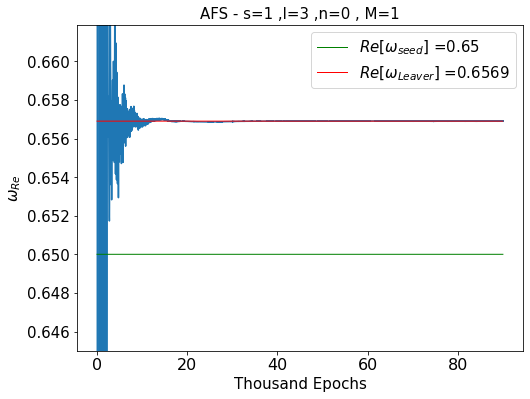

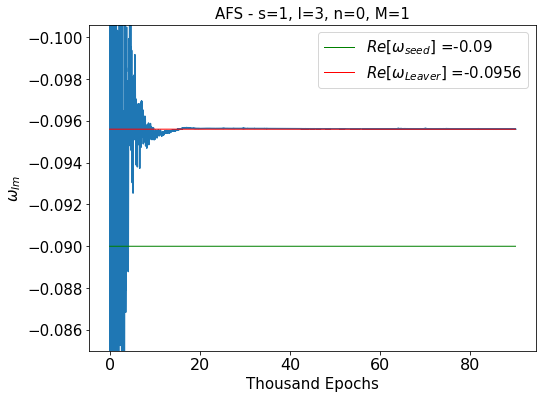

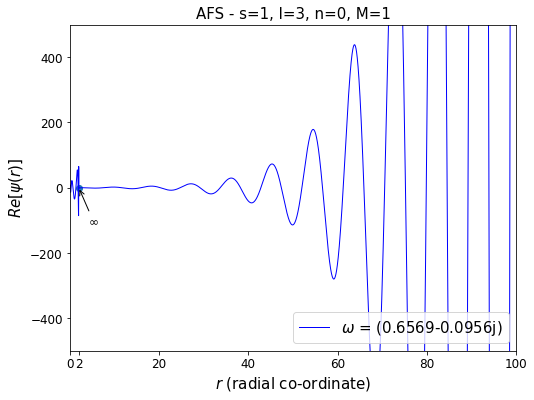

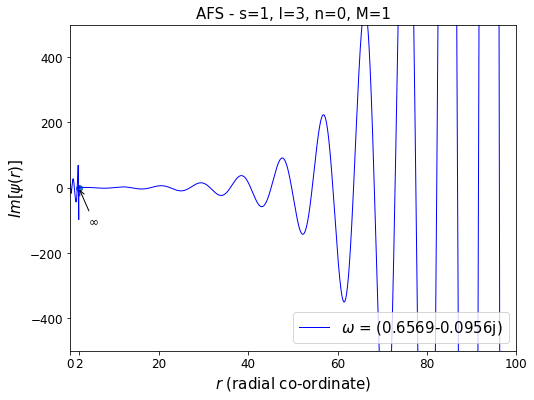

In [9]:
# TRAINING
import pickle
from google.colab import files
from google.colab import drive
import matplotlib.pyplot as plt
import os
from pydub import AudioSegment
from pydub.utils import make_chunks
from itertools import product

drive.mount('/content/gdrive')

# left <xi0> and right <xif> boundary points
xi0 = 0 
xif = 1
# training points, neurons per layer, training epochs, learning rate, minibatch number
n_train, neurons, epochs, lr,mb = 100, 50, int(90e3), 8e-3, 1 

S = [1]
M = [1]
L = [3]
N = [0]
       
full_search_dicts = [dict(zip(['S', 'M', 'L', 'N'], [a, b, c, d])) for a,b,c,d in product(S,M,L,N)]

for i in range(len(full_search_dicts)):
  omega_seed, omega_Lvr = Seed(full_search_dicts[i]['S'], full_search_dicts[i]['M'], full_search_dicts[i]['L'], full_search_dicts[i]['N'])
  path = '/content/gdrive/MyDrive/PINN_Output/AFS_s={},M={},L={},N={}/'.format(full_search_dicts[i]['S'], full_search_dicts[i]['M'], full_search_dicts[i]['L'], full_search_dicts[i]['N']) 
  os.mkdir(path)
  model1,loss_hists1,runTime1 = run_Scan_Black_Hole(xi0, xif, neurons, epochs, n_train, lr, mb, omega_seed, omega_Lvr, full_search_dicts[i]['S'], full_search_dicts[i]['M'], full_search_dicts[i]['L'])
  omega1, omega2, PDev1, PDev2 = QNMs(loss_hists1, path)
  pickle.dump((model1, loss_hists1, runTime1, omega1, omega2, PDev1, PDev2), open(path + "All_Data.pickle","wb"))
  model1, loss_hists1, runTime1, omega1, omega2, PDev1, PDev2 = pickle.load(open(path + "All_Data.pickle","rb"))
  QNM_Frequencies(loss_hists1, omega_seed, omega_Lvr, runTime1, path, full_search_dicts[i]['S'], full_search_dicts[i]['M'], full_search_dicts[i]['L'], full_search_dicts[i]['N'])
  QNM_Wavefunctions(loss_hists1, path, full_search_dicts[i]['S'], full_search_dicts[i]['M'], full_search_dicts[i]['L'], full_search_dicts[i]['N'])
    

#Loading data from google drive (to make comparison plots)

Note that to load the models one needs to define the neural network "skeleton" while the "flesh" is the data saved.

In [1]:
# Importing libraries
!pip install pydub
!pip install pydub
import numpy as np
import torch
import torch.optim as optim
from torch.autograd import grad
from torch.autograd import Variable
import time
import copy
from scipy.integrate import odeint
dtype=torch.float64
torch.set_default_dtype(torch.float64) 

import pickle
from google.colab import files
from google.colab import drive
import matplotlib.pyplot as plt
import os

drive.mount('/content/gdrive')

# left <xi0> and right <xif> boundary points
xi0 = 0 
xif = 1
# training points, neurons per layer, training epochs, learning rate, minibatch number
n_train, neurons, epochs, lr,mb = 100, 50, int(90e3), 8e-3, 1

# Define the sin() activation function
class mySin(torch.nn.Module):
    @staticmethod
    def forward(input):
        return torch.sin(input)

def Parametric_Solution(y, nn, xi0): 
    N = nn(y)[0]
    psi1_hat = N[:,0].reshape(-1,1)
    psi2_hat = N[:,1].reshape(-1,1)
    return psi1_hat, psi2_hat

class FFNN(torch.nn.Module):
    def __init__(self, D_hid):
        super(FFNN,self).__init__()

        # Define the Activation
        #self.actF = torch.nn.Tanh()
        # self.actF = torch.nn.Sigmoid()   
        self.actF = mySin()
         
        # I adjusted the code here to get different configurations of layers (rectangle, funnel, reverse-funnel)
        self.omega1in   = torch.nn.Linear(1,1)
        self.omega2in   = torch.nn.Linear(1,1)
        self.Lin_1  = torch.nn.Linear(3, 50) 
        self.Lin_2  = torch.nn.Linear(50, 50)
        self.out    = torch.nn.Linear(50, 2)

    def forward(self,t):
        In1 = self.omega1in(torch.ones_like(t))
        In2 = self.omega2in(torch.ones_like(t)*(-1))
        L1 = self.Lin_1(torch.cat((t, In1, In2), 1))
        h1 = self.actF(L1)
        L2 = self.Lin_2(h1)
        h2 = self.actF(L2)
        out = self.out(h2)
        return out, In1, In2


### Loading the models:

S = 1
L = [1, 2, 3]

Eigenstates = {}
omega1={}
omega2={}
for i in L:
  path = '/content/gdrive/MyDrive/PINN_Output/AFS_s={},M=1,L={},N=0/'.format(S,i) 
  model1, loss_hists1, runTime1, omega_1, omega_2, PDev1, PDev2 = pickle.load(open(path + "All_Data.pickle","rb"))
  Eigenstates["L_{0}".format(i)] = loss_hists1
  omega1["L_{0}".format(i)] = omega_1
  omega2["L_{0}".format(i)] = omega_2


### Defining the QNM wavefunctions:

num_domain = int(1e5); 
xi1 = torch.linspace(0., 0.998, num_domain).reshape(-1,1) # \xi coordinate
Chi1 = {}
Chi2 = {}
for i in L:
  Chi1["L_{0}".format(i)] = Parametric_Solution(xi1, Eigenstates["L_{0}".format(i)][9][0][0], xi0)[0]
  Chi2["L_{0}".format(i)] = Parametric_Solution(xi1, Eigenstates["L_{0}".format(i)][9][0][0], xi0)[1]

r = np.linspace(0,1000,num_domain).reshape(-1,1) # radial coordinate
M = 1 # mass of black hole
xi2 = 1 - ((2*M)/r) # relationship between xi coordinate and radial coordinate

xi = xi2

chi1 = {}
chi2 = {}
for i in L:
  chi1["L_{0}".format(i)] = -1*Chi1["L_{0}".format(i)].data.numpy()/np.max(np.abs(Chi1["L_{0}".format(i)].data.numpy()))
  chi2["L_{0}".format(i)] = -1*Chi1["L_{0}".format(i)].data.numpy()/np.max(np.abs(Chi1["L_{0}".format(i)].data.numpy()))

def Psi(xi): # as given in Cho et al (2012) for asymp. flat Schwarzschild BHs.
  
  psi_real = {}
  psi_imag = {}
  for i in L:
    omega = (omega1["L_{0}".format(i)] + omega2["L_{0}".format(i)]*1j)
    psi = (xi**(-2*1j*M*omega))*((1 - xi)**(-2*1j*M*omega))*np.exp((2*1j*M*omega)/(1 - xi))*(chi1["L_{0}".format(i)] + chi2["L_{0}".format(i)]*1j)
    psi_real["L_{0}".format(i)] = np.real(psi) # Real part of the n=0 QNM
    psi_imag["L_{0}".format(i)] = np.imag(psi) # Real part of the n=0 QNM
  return psi_real, psi_imag

Psi1, Psi2 = Psi(xi)  

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWgHTFWfYes5WI1zOuwTEM2cs19nbM6c2XCwKhnTe4kYLcpBh9fVqKY
Mounted at /content/gdrive


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: RuntimeWarning: divide by zero encountered in true_divide


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

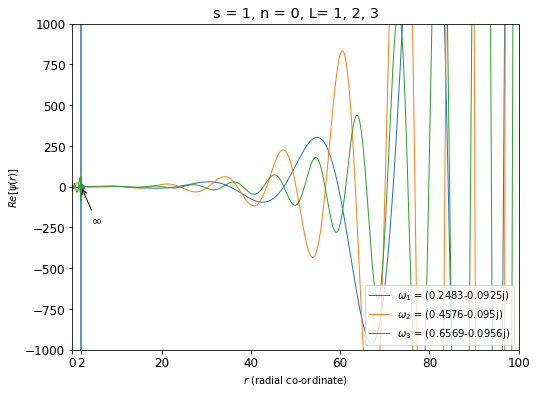

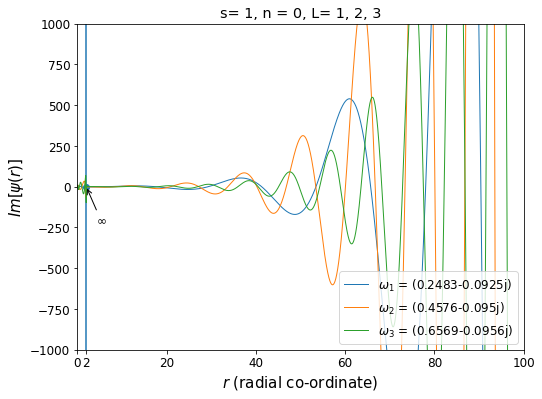

In [2]:
### plotting the real part of Psi

# Figure boundaries
plt.figure(figsize = (8,6))
plt.ylim([-1000, 1000])
plt.xlim([0, 100])
plt.axvline(x = 2)

# Actual plot
for i in L:
  plt.plot(r, Psi1["L_{0}".format(i)], linewidth=1, label = '$\omega_{}$ = {}'.format(i,round(omega1["L_{0}".format(i)], 4) + round(omega2["L_{0}".format(i)], 4)*1j))
plt.legend(loc ="lower right")
# Font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.rc('font', size=12) 
plt.rc('axes', labelsize=12)

# Controlling tick labels
ax = plt.gca()
extraticks = [2] # Tick at r=2 where event horizon occurs
ax.set_xticks(list(ax.get_xticks()) + extraticks)
plt.rc('axes', labelsize=15)

# Labelling the psi(r) at r=2
plt.scatter([2],[0])
plt.annotate('$\infty$', xy=(2,0), xytext=(20,-40),textcoords='offset points', ha='right', va='bottom',arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Plot axes Labels
plt.title("s = {}, n = 0, L= {}, {}, {}".format(S,L[0],L[1],L[2]))
plt.ylabel('$Re[\psi(r)]$');
plt.xlabel('$r$ (radial co-ordinate)')
plt.savefig("QNM_wavefunction1.pdf", bbox_inches='tight') #saving as pdf
files.download("QNM_wavefunction1.pdf")

### plotting the real part of Psi

# Figure boundaries
plt.figure(figsize = (8,6))
plt.ylim([-1000, 1000])
plt.xlim([0, 100])
plt.axvline(x = 2)

# Actual plot
for i in L:
  plt.plot(r, Psi2["L_{0}".format(i)], linewidth=1, label = '$\omega_{}$ = {}'.format(i,round(omega1["L_{0}".format(i)], 4) + round(omega2["L_{0}".format(i)], 4)*1j))
plt.legend(loc ="lower right")

# Font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.rc('font', size=12) 
plt.rc('axes', labelsize=12)

# Controlling tick labels
ax = plt.gca()
extraticks = [2] # Tick at r=2 where event horizon occurs
ax.set_xticks(list(ax.get_xticks()) + extraticks)
plt.rc('axes', labelsize=15)

# Labelling the psi(r) at r=2
plt.scatter([2],[0])
plt.annotate('$\infty$', xy=(2,0), xytext=(20,-40),textcoords='offset points', ha='right', va='bottom',arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Plot axes Labels
plt.title("s= {}, n = 0, L= {}, {}, {}".format(S,L[0],L[1],L[2]))
plt.ylabel('$Im[\psi(r)]$');
plt.xlabel('$r$ (radial co-ordinate)')
plt.savefig("QNM_wavefunction2.pdf", bbox_inches='tight') #saving as pdf
files.download("QNM_wavefunction2.pdf")